# Module One Partner Project 
### Created by: Andy Luc and Connor Anderson
### Student Pace: Full-Time Data Science
### Scheduled project review date/time: 04/19/2019
### Instructors: Miles Erickson & Greg Damico
### Blog Post URL: dev.to/andy

# Business Case:
### Working
We work for a real estate company, and they have a group of loyal customers who are looking to sell their longtime homes. All of the customers live in King County, and want to know how to increase the value of their home through rennovations. We have been asked to discover what features of a home will increase the value of the customers home so that both the customer and our agents can make the most on their rennovation investment***

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Data

#### Source:
#### Timespan of the data (URL): This dataset is from 9/9/2014 - 1/10/2015

In [117]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [118]:
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,10/13/2014,12/9/2014,2/25/2015,12/9/2014,2/18/2015
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,NaN,0,0,0,0
view,0,0,0,0,0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


# Data Preparation

#### Dropping non-numeric values from the `sqft_basement` feature

In [172]:
'''King County DataFrame that Includes logs of various variables '''
kc_data_full = pd.read_csv('kc_house_data.csv')
kc_data_full['sqft_basement'] = kc_data_full['sqft_basement'].replace("?",0)
kc_data_full = kc_data_full[~np.isnan(kc_data_full['waterfront'])]
kc_data_full = kc_data_full[~np.isnan(kc_data_full['view'])]
kc_data_full = kc_data_full.drop(['yr_renovated','lat','long'], axis=1)
kc_data_full['sqft_basement'] = kc_data_full['sqft_basement'].astype(float)
kc_data_full['zipcode'] = kc_data_full['zipcode'].astype(str)
kc_data_full = kc_data_full.drop(['id'], axis=1)

In [176]:
kc_data_full.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,4760,101930


#### Note: After dropping NaN records from waterfront and view, `df` used to have 21,597 records, but now it has 19,164.

# Exploratory Data Analysis:
- OLS Model
- Visualization
- Multi-collinearity

## Visualization

Pairplot of Sqft Living, Bedrooms, Bathrooms in relation to Price.

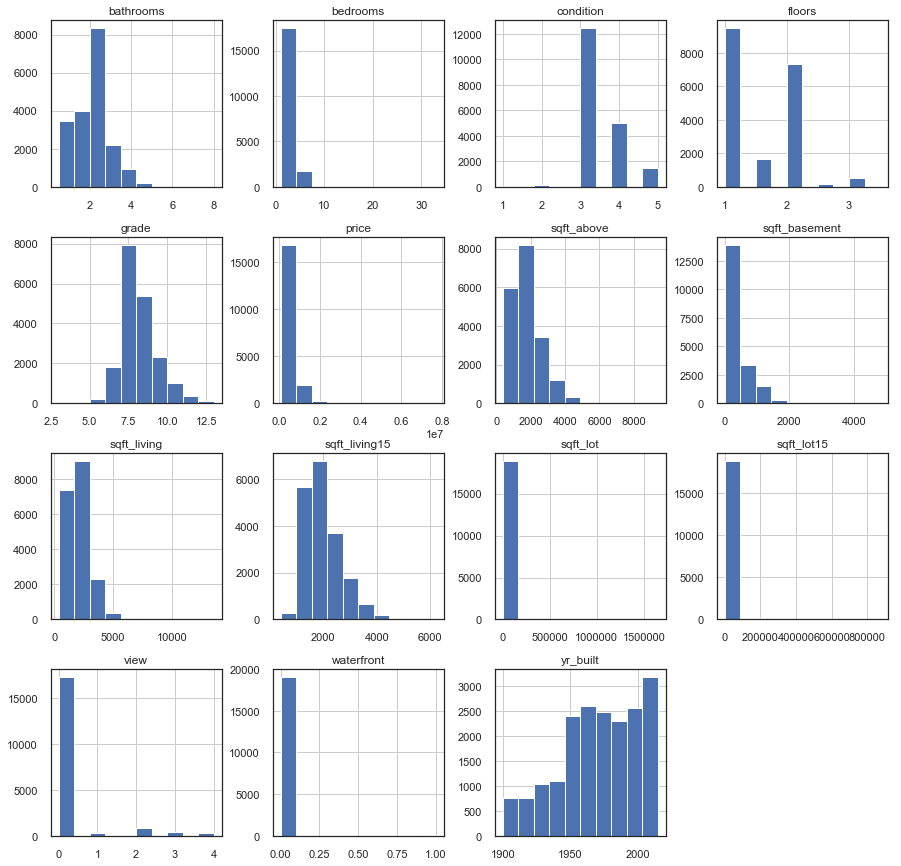

In [175]:
_=kc_data_full.hist(figsize=(15,15))

### Based on the histograms shown above:
- SqFt_Living, SqFt_Living15, SqFt_Above, and Yr_Built are all skewed.
- Some outliers we may need to look at are SqFt_Lot and SqFt_Lot15
- Grade is very normal, so it could be a good indicator against price.

In [177]:
kc_train = kc_data_full[:9000]
kc_train = kc_train.loc[kc_train['yr_built'] > 1975]
log_sqft_living = np.log(kc_train['sqft_living'])
log_bedrooms = np.log(kc_train['bedrooms'])
log_yr_built = np.log(kc_train['yr_built'])
kc_train['log_sqft'] = log_sqft_living
kc_train['log_bedrooms'] = log_bedrooms
kc_train['log_yr_built'] = log_yr_built
kc_train['price'] = np.log(kc_train['price'])

In [178]:
kc_train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,log_sqft,log_bedrooms,log_yr_built
4,2/18/2015,13.142166,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503,7.426549,1.098612,7.594381
5,5/12/2014,14.022525,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,4760,101930,8.597851,1.386294,7.601402
6,6/27/2014,12.458775,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,98003,2238,6819,7.447168,1.098612,7.598399
9,3/12/2015,12.685408,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,98038,2390,7570,7.544332,1.098612,7.602401
13,10/7/2014,12.899220,3,1.75,1370,9680,1.0,0.0,0.0,4,7,1370,0.0,1977,98074,1370,10208,7.222566,1.098612,7.589336


/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


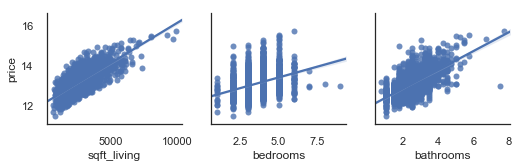

In [180]:
sns.pairplot(kc_train,x_vars=['sqft_living','bedrooms','bathrooms'], y_vars='price', kind='reg')

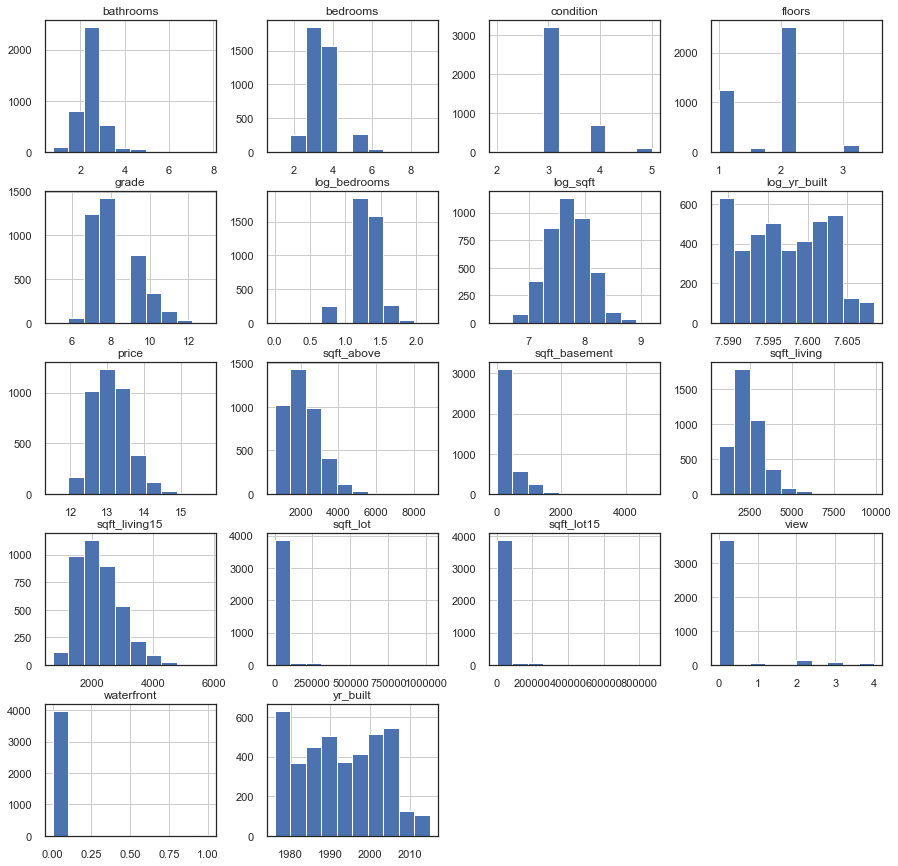

In [179]:
_=kc_train.hist(figsize=(15,15))

## Multi-Collinearity of Features 

Text(0.5, 1.0, 'Multi-Collinearity of Features')

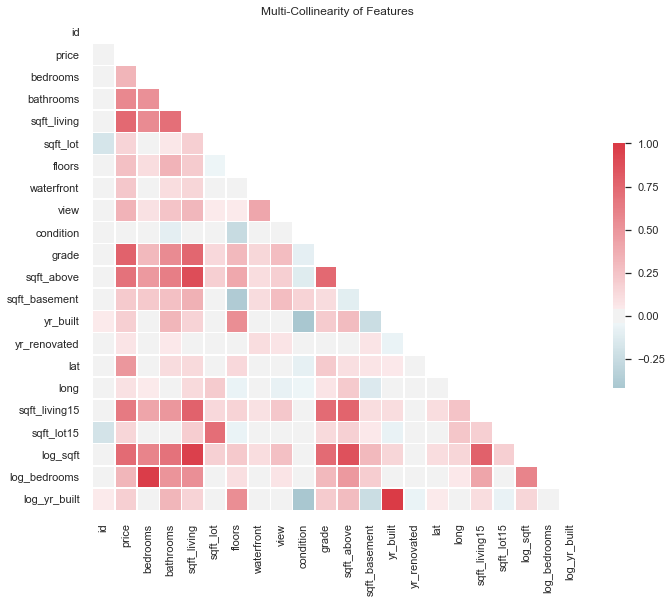

In [165]:
sns.set(style="white")

# Create a covariance matrix
corr = kc_train.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})

ax.set_title('Multi-Collinearity of Features')

In [170]:
(kc_train.iloc[:, 1:]).corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,log_sqft,log_bedrooms,log_yr_built
price,1.000000,0.333824,0.573733,0.750144,0.159711,0.263915,0.228608,0.342739,-0.033542,0.776819,...,0.217946,0.188935,0.069246,0.499901,0.090099,0.649516,0.151156,0.730969,0.324619,0.188902
bedrooms,0.333824,1.000000,0.525243,0.555573,-0.001710,0.109082,-0.007361,0.090041,0.023444,0.310787,...,0.219746,0.039705,0.015201,0.003198,0.042818,0.415628,-0.008923,0.597750,0.976754,0.039659
bathrooms,0.573733,0.525243,1.000000,0.707180,0.060535,0.342931,0.116618,0.247188,-0.101347,0.559682,...,0.264076,0.319541,0.051670,0.119841,-0.008739,0.493643,0.033165,0.685688,0.507111,0.319677
sqft_living,0.750144,0.555573,0.707180,1.000000,0.194875,0.205426,0.155907,0.316483,-0.029695,0.753803,...,0.356907,0.164610,0.039181,0.126770,0.135103,0.773300,0.197398,0.962018,0.539466,0.164710
sqft_lot,0.159711,-0.001710,0.060535,0.194875,1.000000,-0.047022,-0.003252,0.041593,0.022280,0.137697,...,0.033682,-0.032241,-0.001691,-0.012180,0.205885,0.139313,0.714033,0.184144,-0.003813,-0.032068
floors,0.263915,0.109082,0.342931,0.205426,-0.047022,1.000000,0.028097,0.045996,-0.253236,0.302438,...,-0.374519,0.544567,-0.012497,0.140301,-0.055751,0.165609,-0.054951,0.221746,0.105932,0.544850
waterfront,0.228608,-0.007361,0.116618,0.155907,-0.003252,0.028097,1.000000,0.408114,-0.010434,0.143704,...,0.119347,-0.006491,0.113823,0.013197,-0.031850,0.092023,0.009222,0.116600,-0.013462,-0.006466
view,0.342739,0.090041,0.247188,0.316483,0.041593,0.045996,0.408114,1.000000,0.028578,0.283684,...,0.286798,-0.020116,0.069398,-0.001992,-0.072447,0.228497,0.033674,0.271105,0.078472,-0.020094
condition,-0.033542,0.023444,-0.101347,-0.029695,0.022280,-0.253236,-0.010434,0.028578,1.000000,-0.090826,...,0.170047,-0.418058,-0.018152,-0.080101,-0.036944,-0.028857,0.036486,-0.033000,0.026226,-0.418352
grade,0.776819,0.310787,0.559682,0.753803,0.137697,0.302438,0.143704,0.283684,-0.090826,1.000000,...,0.121558,0.210972,0.028770,0.217980,0.071383,0.726653,0.129403,0.732353,0.311303,0.211174


#### The chart above is the numerical way of describing the collinearity between features. As we get closer to 1, they are more highly correlated and should not be used in the same model.

In [171]:
abs(kc_train.corr()) > .75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,log_sqft,log_bedrooms,log_yr_built
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
bathrooms,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


#### The chart above is stating that any feature that has a collinearity of .75 or higher should be dropped from the dataframe to possibly achieve a better predictability model. Hence, any coefficient that has the highest number of "True" should be analyzed.

# Modeling

## OLS Modeling 
##### Using Statsmodels

In [130]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [131]:
f = 'price~ sqft_living'

model = ols(formula=f, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.887e+04
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:06:46   Log-Likelihood:            -2.6638e+05
No. Observations:               19164   AIC:                         5.328e+05
Df Residuals:                   19162   BIC:                         5.328e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -4.86e+04   4697.110    -10.348      

In [132]:
model.params

Intercept     -48604.077596
sqft_living      283.401625
dtype: float64

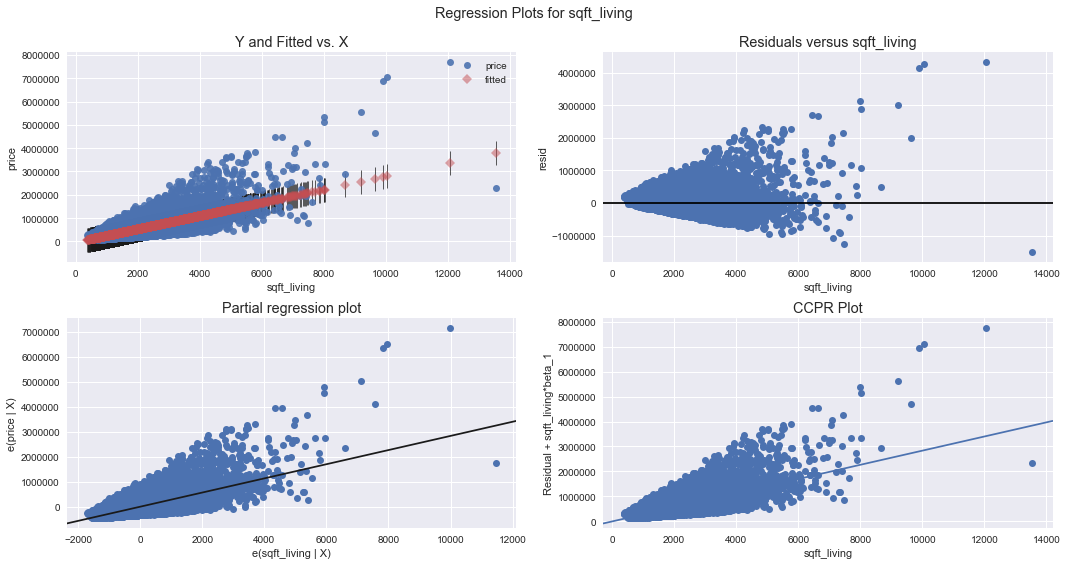

In [133]:
fig = plt.figure(figsize =(15,8))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)

# Linear Regression Modeling

### Linear Regression Modeling using Sklearn

In [181]:
import sklearn
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [185]:
# Input: 
# df = Dataframe
# Feature_cols - A list of strings referencing each feature

# Output:
# print statements regarding the model output


def models(df, feature_cols):
    '''This is a function that outputs the Intercept, Coefficients, 3 types of Errors, and R-Squared'''
    X = kc_train[feature_cols]
    y = kc_train['price']
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    print(f'Intercept of the regression line:',linreg.intercept_)
    print(f'Coefficients:',linreg.coef_)
    print('\n')
    
    y_pred = linreg.predict(X_test)

    
    print(f'Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print(f'Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print(f'Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print(f'R-Squared:',round(linreg.score(X,y),3))
    print('\n')
    
    print(f'Mean Absolute Error exp:', np.exp(metrics.mean_absolute_error(y_test, y_pred)))
    print(f'Mean Squared Error exp:', np.exp(metrics.mean_squared_error(y_test, y_pred)))

### MODEL 1
Sqft vs Price

In [186]:
models(df=kc_train, feature_cols=['sqft_living'])

Intercept of the regression line: 12.13434542959356
Coefficients: [0.00040939]


Mean Absolute Error: 0.2752655710300938
Mean Squared Error: 0.11358925648702262
Root Mean Squared Error: 0.33703005279503284
R-Squared: 0.562


Mean Absolute Error exp: 1.3168803537053257
Mean Squared Error exp: 1.1202918777474349


### Model 2
Sqft Living, Bedrooms, Bathrooms vs Price. All of these factors are attributes of the house, and may increase or decrease price depending on whether they increase or decrease.

In [187]:
models(df=kc_train, feature_cols=['sqft_living','bedrooms','bathrooms'])

Intercept of the regression line: 12.2486857656149
Coefficients: [ 0.00039586 -0.08456384  0.08451278]


Mean Absolute Error: 0.26815261535921614
Mean Squared Error: 0.10575258967425623
Root Mean Squared Error: 0.325196232564672
R-Squared: 0.58


Mean Absolute Error exp: 1.307546676494108
Mean Squared Error exp: 1.1115468343194368


### MODEL 3
SqFt_Living15, Sqft_Lot15, Grade vs Price: These factors were selected to see if there was a correlation between quality of neighborhood vs the price of home.

In [190]:
models(df=kc_train, feature_cols=['sqft_living15','sqft_lot15','grade'])

Intercept of the regression line: 10.517534530646081
Coefficients: [1.18629057e-04 5.79808349e-07 2.83165087e-01]


Mean Absolute Error: 0.2469331504474992
Mean Squared Error: 0.09642224209170915
Root Mean Squared Error: 0.3105193103362642
R-Squared: 0.62


Mean Absolute Error exp: 1.2800935362378685
Mean Squared Error exp: 1.1012239489437174


## Model Comparison Graph

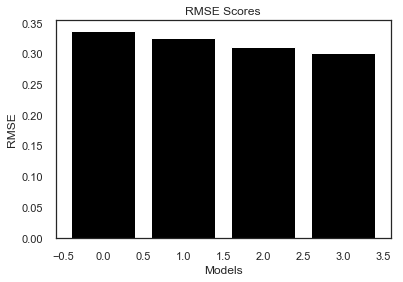

In [200]:
Values ={'Model 1': 0.337, 'Model 2': 0.325, 
         'Model 3': 0.310, 'Model 4': 0.300,}

plt.bar(range(len(Values)), list(Values.values()), color = ('Black'))
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Scores')
plt.show()

## Model 4 (Final Model)

In [143]:
kc_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_sqft,log_bedrooms,log_yr_built
4,1954400510,2/18/2015,13.142166,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,7.426549,1.098612,7.594381
5,7237550310,5/12/2014,14.022525,4,4.50,5420,101930,1.0,0.0,0.0,...,2001,0.0,98053,47.6561,-122.005,4760,101930,8.597851,1.386294,7.601402
6,1321400060,6/27/2014,12.458775,3,2.25,1715,6819,2.0,0.0,0.0,...,1995,0.0,98003,47.3097,-122.327,2238,6819,7.447168,1.098612,7.598399
9,3793500160,3/12/2015,12.685408,3,2.50,1890,6560,2.0,0.0,0.0,...,2003,0.0,98038,47.3684,-122.031,2390,7570,7.544332,1.098612,7.602401
13,6054650070,10/7/2014,12.899220,3,1.75,1370,9680,1.0,0.0,0.0,...,1977,0.0,98074,47.6127,-122.045,1370,10208,7.222566,1.098612,7.589336


## Cross Validation

In [152]:
feature_col = ['log_sqft', 'log_bedrooms']
X = kc_train[feature_col]
y = kc_train['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.5)

linreg1 = LinearRegression()
results = linreg1.fit(X_train, y_train)

print(np.exp(linreg1.intercept_))

129.16531898422866


In [153]:
print (X_train.shape, y_train.shape)


(2009, 2) (2009,)


In [154]:
predictions = np.exp(linreg1.predict(X_test))
predictions[0:5]


array([584919.59561125, 359129.10685856, 402503.21396189, 435341.09694613,
       775262.04556938])

In [155]:
standardY= np.exp((y_test))
print(standardY)
standard = (predictions)
print(standard)

9227      500000.0
2048      235000.0
2049      272000.0
1406      283500.0
4588      851000.0
6260      359000.0
3132      275000.0
9090      568000.0
6596     1040000.0
373       380000.0
8239      500000.0
3320      452500.0
10150     449950.0
7901      329000.0
4133      399950.0
8790      975000.0
808       581000.0
2700      675000.0
856       265000.0
4206      255000.0
5556     1150000.0
1712      799000.0
9687      315000.0
8184     2450000.0
4315      432500.0
5401      459900.0
5015      798750.0
5950      285000.0
4380      550000.0
984       535000.0
           ...    
5896     1030000.0
2647      645000.0
2980      740000.0
8635     1440000.0
1434      480000.0
6952      196500.0
2148      585000.0
789       408200.0
1514      270000.0
8119      259950.0
6657      525000.0
217       445838.0
8138      394000.0
6707      286000.0
2094      383000.0
8473      236000.0
7138      410000.0
2224      670000.0
4403      270000.0
406       450000.0
798       470000.0
5083      35

In [156]:
print(np.sqrt(sum((standardY - standard) ** 2) / len(standardY)))

263765.3609600618


In [157]:
print('Score', linreg1.score(X_test, y_test))

Score 0.5587270924320507


In [158]:
scores = cross_val_score(linreg1, X, y, cv=5)
print('Cross Validated Scores', scores)

Cross Validated Scores [0.55348794 0.58956676 0.50609734 0.59632402 0.49917338]


Text(0, 0.5, 'Predictions')

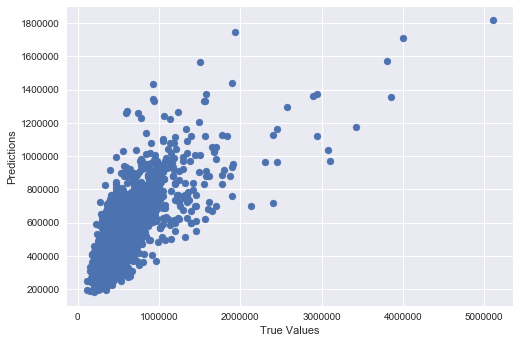

In [159]:
plt.scatter(standardY, standard)
plt.xlabel('True Values')
plt.ylabel('Predictions')